# 上課摘要紀錄

In [22]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5") #老師說這邊可以直接load sklearn內建的iris dataset
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 切分資料 (為作圖方便，先只選取兩個features)-上課時

In [6]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度','花萼寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# 標準化

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# KNN
可調整k, weight (uniform, distance)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform') 
#weights=uniform 為預設值,n_neighbors根據最近多少個鄰居(K) 決定類別

knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# 準確度與混淆矩陣

In [16]:
#準確度
print(metrics.classification_report(y_test, knn.predict(X_test_std))) 
#混淆矩陣
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))


                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.96        13
Iris-versicolor       0.60      0.56      0.58        16
 Iris-virginica       0.62      0.62      0.62        16

    avg / total       0.70      0.71      0.71        45

[[13  0  0]
 [ 1  9  6]
 [ 0  6 10]]


# 視覺化混淆矩陣函式（from scikit-learn官網）

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[13  0  0]
 [ 1  9  6]
 [ 0  6 10]]


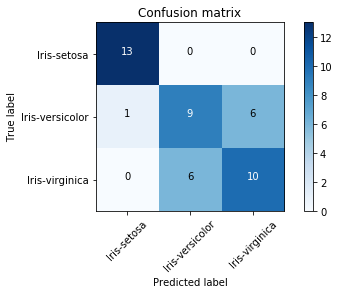

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test_std))

#注意：targeet_names必須和confusion_matrix中labels的順序一致
target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.show()


# 決策邊界-Decision boundary

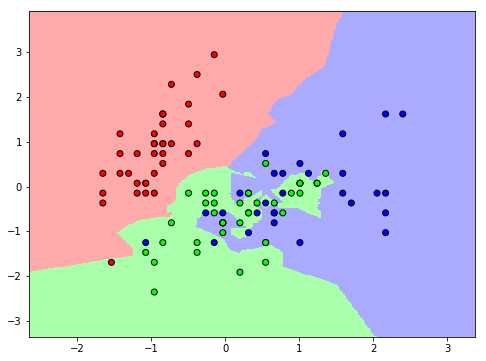

In [41]:
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches


# 把類別轉成0,1,2，散佈圖上色用
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_color = le.transform(y_train)


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) 

h = .02  # 著色時每格大小

# 設定x,y邊界、著色格子
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# 預測、類別轉成0,1,2
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = le.transform(z)

# Put the result into a color plot
#Z = Z.reshape(xx.shape)
z = z.reshape(xx.shape)
#plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))

# 上色
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

# 資料散佈
#plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')

# x,y邊界設定
#plt.xlim(xx.min(), xx.max())
plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.ylim(yy.min(), yy.max())

plt.show()